# Homework 1 - Sean Saito

Implementation of 2D image convolution. Uses the following kernels:
* Sobel kernel
* Gaussian kernel
* Haar-like masks

In [1]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
matplotlib.rcParams['figure.figsize'] = (15.0, 7.5)

# Global variables
im_file = "2007_000364.jpg"
grey_file = "greyscale.png"

# Greyscale the image
img = Image.open(im_file).convert('L')
img.save(grey_file)

/Users/saito/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


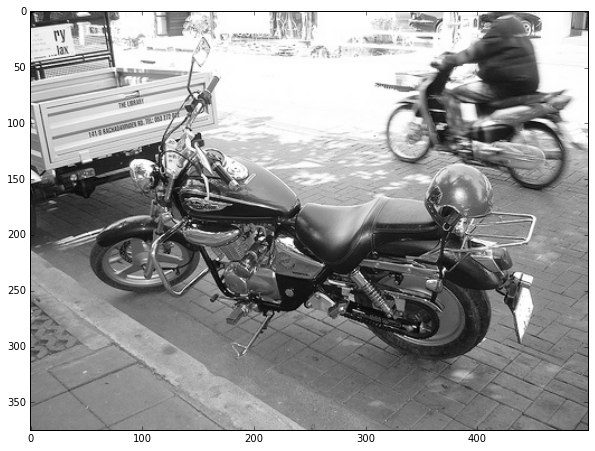

In [2]:
# Now get the image via matplotlib
img = mpimg.imread(grey_file)

# Show original
plt.imshow(img, cmap='Greys_r')

In [3]:
# The numpy array
img

array([[ 0.1254902 ,  0.13333334,  0.16078432, ...,  0.56470591,
         0.22352941,  0.22352941],
       [ 0.14509805,  0.13333334,  0.16078432, ...,  0.5411765 ,
         0.19215687,  0.21960784],
       [ 0.1254902 ,  0.13725491,  0.16078432, ...,  0.53725493,
         0.19215687,  0.23921569],
       ..., 
       [ 0.39607844,  0.41176471,  0.41568628, ...,  0.32941177,
         0.30980393,  0.36862746],
       [ 0.40000001,  0.39607844,  0.3882353 , ...,  0.38039216,
         0.36078432,  0.30980393],
       [ 0.38431373,  0.39607844,  0.3764706 , ...,  0.35686275,
         0.29803923,  0.33333334]], dtype=float32)

In [4]:
# Kernels

gaussian_kernel = np.array([
        [1, 4, 7, 4, 1],
        [4, 16, 26, 16, 4],
        [7, 26, 41, 26, 7],
        [4, 16, 26, 16, 4],
        [1, 4, 7, 4, 1]
    ]) / 273.0

sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

sobel_y = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])

haar_white = np.zeros((10, 10))
haar_white.fill(1)
haar_black = np.zeros((10, 10))
haar_black.fill(-1)

haar_edge_x = np.hstack((np.vstack((haar_white, haar_black)) 
                         for _ in range(2)))
haar_edge_y = np.vstack((np.hstack((haar_white, haar_black))
                         for _ in range(2)))

haar_line_x = np.hstack((np.vstack((haar_white, haar_black, haar_white))
                         for _ in range(3)))
                        
haar_line_y = np.vstack((np.hstack((haar_white, haar_black, haar_white))
                         for _ in range(3)))

haar_checkers = np.vstack((np.hstack((haar_white, haar_black)), 
                          np.hstack((haar_black, haar_white))))

In [5]:
# Dictionary of kernels used for convolution

kernels = {
    "gaussian": [gaussian_kernel],
    "sobel": [sobel_x, sobel_y],
    "haar_edge": [haar_edge_x, haar_edge_y],
    "haar_line": [haar_line_x, haar_line_y],
    "haar_checkers": [haar_checkers]
}

In [6]:
def convolution(X, kernel):
    """
    Apply convolution over an image using a kernel
    
    Args:
        X         : numpy.ndarray
            input image
        kernel    : list
            list of filters. All filters should have the same dimension
    """
    
    shape = X.shape
    kernel_shape = kernel[0].shape
    
    # Number of rows and columns
    target_x = shape[0] - kernel_shape[0] + 1
    target_y = shape[1] - kernel_shape[1] + 1
    
    target = np.zeros((target_x, target_y))
    
    for i in range(target_x):
        for j in range(target_y):
            input_sub = X[i:(i+kernel_shape[0]), j:(j+kernel_shape[1])]
            combined = 0
            for f in kernel:
                interm = np.sum(np.multiply(input_sub, f))
                combined += np.absolute(interm)
            target[i, j] = combined
    
    return target


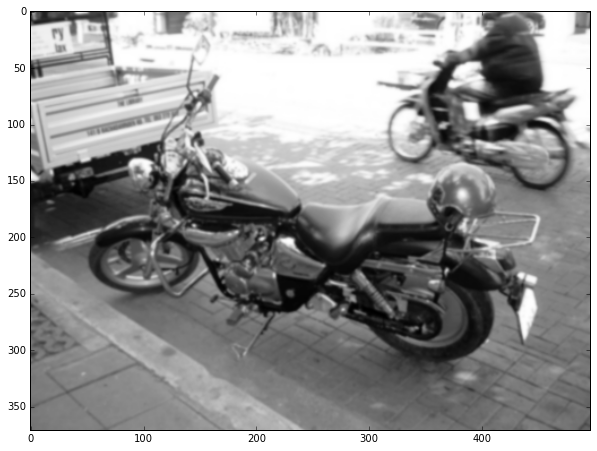

In [7]:
# Gaussian convolution
gauss_res = convolution(img, kernels["gaussian"])
plt.imshow(gauss_res, cmap="Greys_r")

In [8]:
# What does it look like?
gauss_res[:10,]

array([[ 0.20792933,  0.29022482,  0.33369246, ...,  0.50509231,
         0.53505712,  0.45165555],
       [ 0.23368527,  0.36795232,  0.46024565, ...,  0.51399844,
         0.53610574,  0.44157152],
       [ 0.23141565,  0.39251599,  0.54601739, ...,  0.5209366 ,
         0.53515767,  0.43089853],
       ..., 
       [ 0.17164405,  0.2244344 ,  0.35617325, ...,  0.54587375,
         0.50104146,  0.35374561],
       [ 0.1725203 ,  0.19724198,  0.27846011, ...,  0.54787045,
         0.48827122,  0.3343676 ],
       [ 0.1956044 ,  0.20271494,  0.2155139 , ...,  0.54897653,
         0.47432308,  0.31599513]])

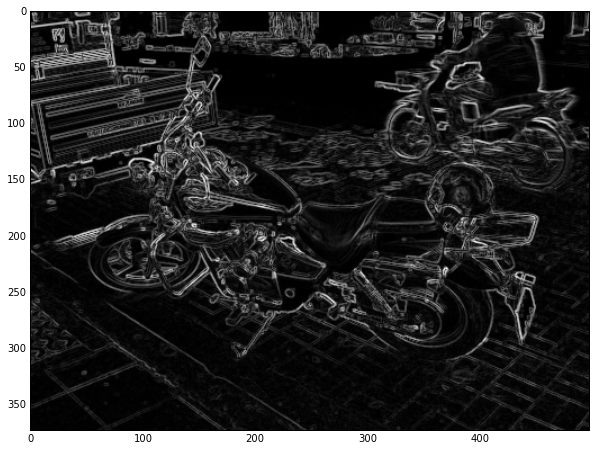

In [9]:
# Sobel convolution
sobel_res = convolution(img, kernels["sobel"])
plt.imshow(sobel_res, cmap="Greys_r")

In [10]:
# What does it look like?
sobel_res[:10,]

array([[ 0.10980392,  0.50196078,  0.40000001, ...,  0.36862755,
         1.78823537,  1.35686284],
       [ 0.1490196 ,  1.00392157,  1.7803922 , ...,  0.18039227,
         1.92941183,  1.30196089],
       [ 0.13333331,  1.13725488,  2.90196079, ...,  0.07058823,
         2.06274521,  1.24705893],
       ..., 
       [ 0.03137255,  0.04705882,  1.12941182, ...,  1.35686281,
         2.00784323,  0.36078429],
       [ 0.23529413,  0.05490196,  0.57254905, ...,  1.57647067,
         2.0235295 ,  0.40000001],
       [ 0.36862746,  0.05490196,  0.29019611, ...,  1.74901968,
         1.86666673,  0.20392156]])

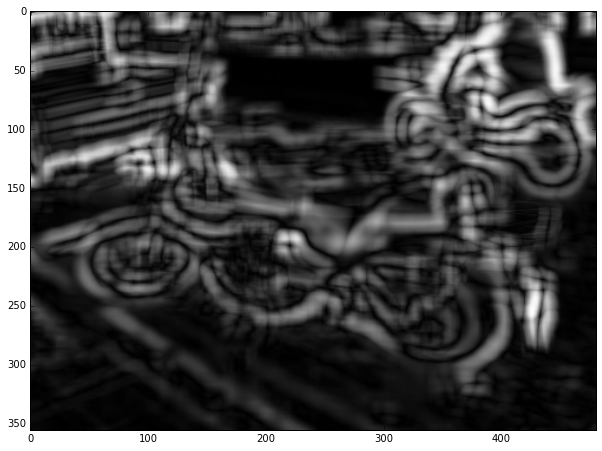

In [11]:
# Haar-Edge convolution
haar_edge_res = convolution(img, kernels["haar_edge"])
plt.imshow(haar_edge_res, cmap="Greys_r")

In [12]:
# What does it look like?
haar_edge_res[:10,]

array([[  55.54509829,   57.29411784,   58.6745099 , ...,   59.32549018,
          53.6313729 ,   46.7058827 ],
       [  67.74117677,   69.72549045,   71.26274528, ...,   55.95294121,
          48.65098074,   40.23529446],
       [  82.37647042,   84.33725527,   85.59215714, ...,   52.26666659,
          43.39607841,   37.76470593],
       ..., 
       [ 111.74117641,  110.4392156 ,  106.79999997, ...,   64.39215672,
          62.50980386,   60.79215682],
       [ 101.01176469,  100.31372544,   96.89411767, ...,   73.19999984,
          72.07058811,   71.08235285],
       [  89.42745094,   88.65882346,   85.59999998, ...,   75.84313664,
          75.20784256,   74.81568575]])

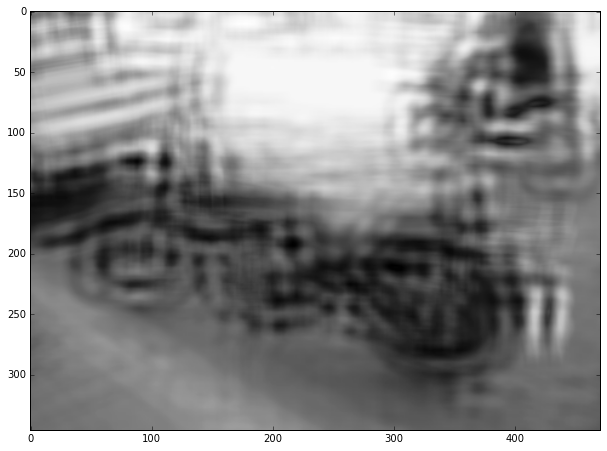

In [13]:
# Haar-Line convolution
haar_line_res = convolution(img, kernels["haar_line"])
plt.imshow(haar_line_res, cmap="Greys_r")

In [14]:
# What does it look like?
haar_line_res[:10,]

array([[ 306.48627982,  296.25882885,  296.29020135, ...,  517.62353092,
         522.35294241,  528.65882483],
       [ 296.29804444,  286.23529938,  286.18039741, ...,  523.89804074,
         527.95294246,  533.49804056],
       [ 284.29020125,  275.01176988,  274.50980905, ...,  529.42745239,
         532.69019729,  537.23921695],
       ..., 
       [ 295.95294635,  295.37255427,  296.74510325, ...,  524.58039296,
         524.8392165 ,  525.0117656 ],
       [ 316.61961295,  316.29020128,  317.36471106, ...,  517.16078505,
         516.84705961,  516.38431457],
       [ 331.96863279,  330.7607898 ,  331.05098588, ...,  513.74117771,
         513.11372676,  512.31372678]])

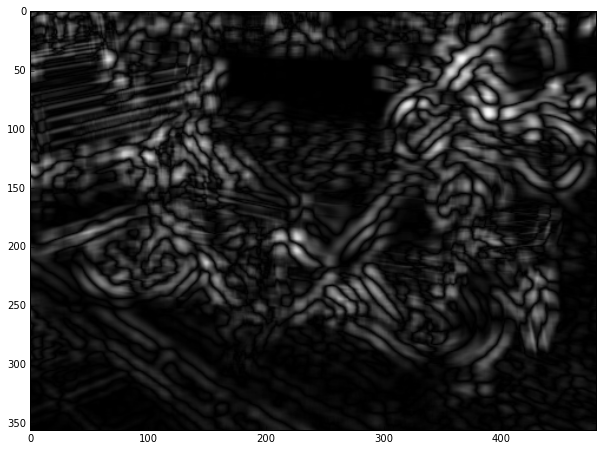

In [15]:
# Haar-Checkers convolution
haar_checkers_res = convolution(img, kernels["haar_checkers"])
plt.imshow(haar_checkers_res, cmap="Greys_r")

In [16]:
# What does it look like?
haar_checkers_res[:10,]

array([[ 0.25098038,  0.26666665,  0.28235292, ...,  0.81568626,
         2.28235313,  5.36078471],
       [ 0.17254901,  0.19215685,  0.21176469, ...,  1.96470603,
         4.54117677,  6.94902009],
       [ 0.09411764,  0.11764705,  0.14117646, ...,  4.05882379,
         5.921569  ,  7.50980444],
       ..., 
       [ 0.18823504,  0.14117616,  0.09411728, ...,  4.37647108,
         1.88627485,  1.43529391],
       [ 0.18823504,  0.14117616,  0.09411728, ...,  2.85098088,
         0.34509772,  4.47843125],
       [ 0.14117622,  0.09411734,  0.04705846, ...,  0.47451017,
         3.14117631,  7.73333337]])